In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
!apt-get update -qq
!apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # Windows
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # 리눅스 등 기타

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


✅ 단순 회귀분석 (ShelveLoc만 사용)
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.27e-33
Time:                        08:08:43   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
I

Text(0.5, 1.0, 'Sales by Shelf Location')

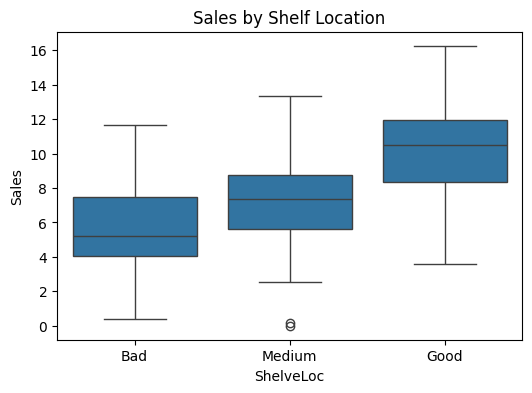

In [67]:
# 1. 기본 라이브러리 불러오기
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 데이터 불러오기
file_path = '/content/drive/My Drive/Colab Notebooks/Carseats.csv'  # Colab 환경 기준 경로
df = pd.read_csv(file_path)

# 3. 범주형 변수 인코딩 (ShelveLoc)
df['ShelveLoc'] = df['ShelveLoc'].astype('category')

# 4. 단순 회귀모델: ShelveLoc만 사용 (범주형 자동 처리됨)
model_simple = smf.ols('Sales ~ C(ShelveLoc)', data=df).fit()
print("\n✅ 단순 회귀분석 (ShelveLoc만 사용)")
print(model_simple.summary())

# 5. 다중 회귀모델: ShelveLoc + 수치 변수 함께 사용
model_full = smf.ols('Sales ~ C(ShelveLoc) + Price + Advertising + Age + Income', data=df).fit()
print("\n✅ 다중 회귀분석 (ShelveLoc + 기타 변수)")
print(model_full.summary())

# 6. 시각화: ShelveLoc별 Sales 분포
plt.figure(figsize=(6, 4))
sns.boxplot(x='ShelveLoc', y='Sales', data=df, order=['Bad', 'Medium', 'Good'])
plt.title('Sales by Shelf Location')

In [68]:
# 진열 위치 이진 분류: Good(1), 그 외(0)
df['Is_Good'] = (df['ShelveLoc'] == 'Good').astype(int)

# 설명 변수와 종속 변수 설정
X = df[['Sales', 'Advertising', 'Price', 'Age']]
X = sm.add_constant(X)
y = df['Is_Good']

# 로지스틱 회귀
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.264550
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Is_Good   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.4885
Time:                        08:08:44   Log-Likelihood:                -105.82
converged:                       True   LL-Null:                       -206.90
Covariance Type:            nonrobust   LLR p-value:                 1.290e-42
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -24.3169      2.945     -8.258      0.000     -30.088     -18.546
Sales           1.2868    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

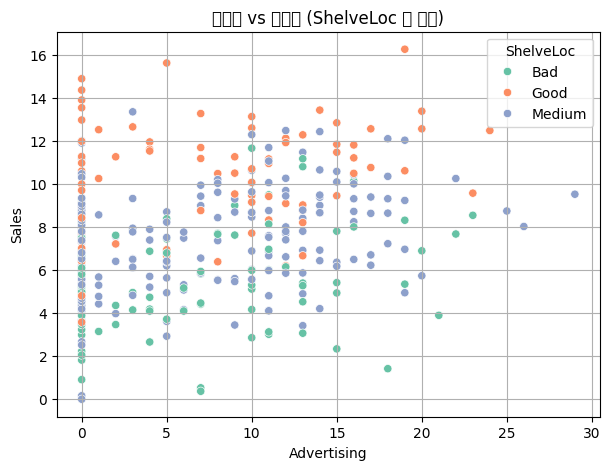

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# 진열 위치를 색으로 나눠서 시각화
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Advertising', y='Sales', hue='ShelveLoc', palette='Set2')
plt.title('광고비 vs 판매량 (ShelveLoc 색 구분)')
plt.grid(True)
plt.show()

In [70]:
# 광고 0 vs 광고 > 0 으로 그룹 나누기
df['Ad_Group'] = df['Advertising'].apply(lambda x: 'No_Ad' if x == 0 else 'Ad')

In [71]:
import pandas as pd

# 교차표로 진열위치별 분포 보기
shelve_dist = pd.crosstab(df['Ad_Group'], df['ShelveLoc'], normalize='index') * 100
print(shelve_dist.round(2))

ShelveLoc    Bad   Good  Medium
Ad_Group                       
Ad         23.83  22.27   53.91
No_Ad      24.31  19.44   56.25


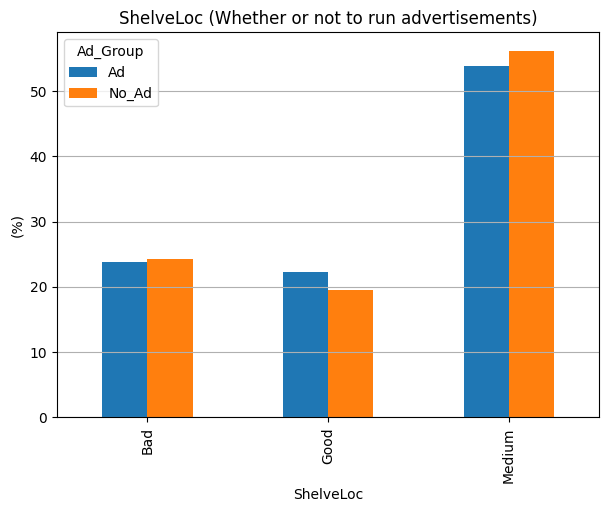

In [72]:
import matplotlib.pyplot as plt

shelve_dist.T.plot(kind='bar', figsize=(7,5))
plt.title('ShelveLoc (Whether or not to run advertisements)')
plt.ylabel('(%)')
plt.xlabel('ShelveLoc')
plt.grid(axis='y')
plt.show()

In [73]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 사후 분석
tukey = pairwise_tukeyhsd(endog=df['Sales'], groups=df['ShelveLoc'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   Bad   Good   4.6911   0.0  3.8714  5.5108   True
   Bad Medium   1.7837   0.0    1.11  2.4573   True
  Good Medium  -2.9074   0.0 -3.6107 -2.2041   True
---------------------------------------------------


In [74]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 광고 유무(0 vs >0)를 새로운 열로 생성
df['Ad_Binary'] = (df['Advertising'] > 0).astype(int)

# OLS 회귀모형 + 상호작용 포함
model = ols('Sales ~ C(Ad_Binary) * C(ShelveLoc)', data=df).fit()

# 분산분석표 출력
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                sum_sq     df          F        PR(>F)
C(Ad_Binary)                 84.881773    1.0  16.063542  7.325663e-05
C(ShelveLoc)                992.863628    2.0  93.947770  4.347955e-34
C(Ad_Binary):C(ShelveLoc)     5.916308    2.0   0.559819  5.717662e-01
Residual                   2081.945474  394.0        NaN           NaN


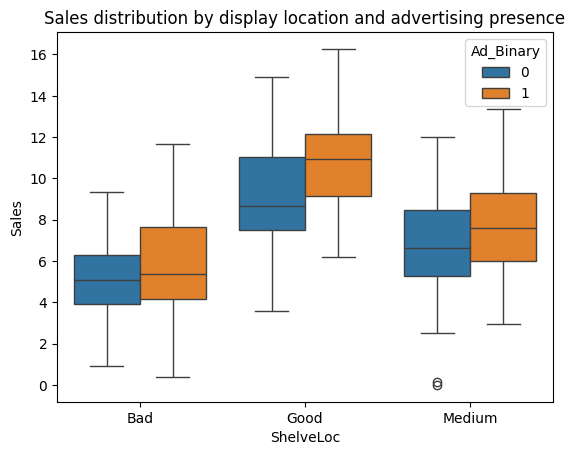

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='ShelveLoc', y='Sales', hue='Ad_Binary', data=df)
plt.title('Sales distribution by display location and advertising presence')
plt.show()

In [60]:
df['Sales_Adv'] = df['Sales'] * df['Advertising']

import statsmodels.api as sm

X = df[['Sales', 'Advertising', 'Sales_Adv', 'Price', 'Age']]
X = sm.add_constant(X)
y = (df['ShelveLoc'] == 'Good').astype(int)

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.264245
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ShelveLoc   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.4891
Time:                        07:56:23   Log-Likelihood:                -105.70
converged:                       True   LL-Null:                       -206.90
Covariance Type:            nonrobust   LLR p-value:                 8.690e-42
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -23.8973      3.040     -7.861      0.000     -29.855     -17.939
Sales           1.2464    

In [61]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터프레임 df
model = ols('Sales ~ C(ShelveLoc) + C(Ad_Binary) + C(ShelveLoc):C(Ad_Binary)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                sum_sq     df          F        PR(>F)
C(ShelveLoc)                992.863628    2.0  93.947770  4.347955e-34
C(Ad_Binary)                 84.881773    1.0  16.063542  7.325663e-05
C(ShelveLoc):C(Ad_Binary)     5.916308    2.0   0.559819  5.717662e-01
Residual                   2081.945474  394.0        NaN           NaN


/tmp/ipython-input-77-4058965543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df, x="ShelveLoc", y="Sales", col="Ad_Binary",
/tmp/ipython-input-77-4058965543.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=df, x="ShelveLoc", y="Sales", col="Ad_Binary",


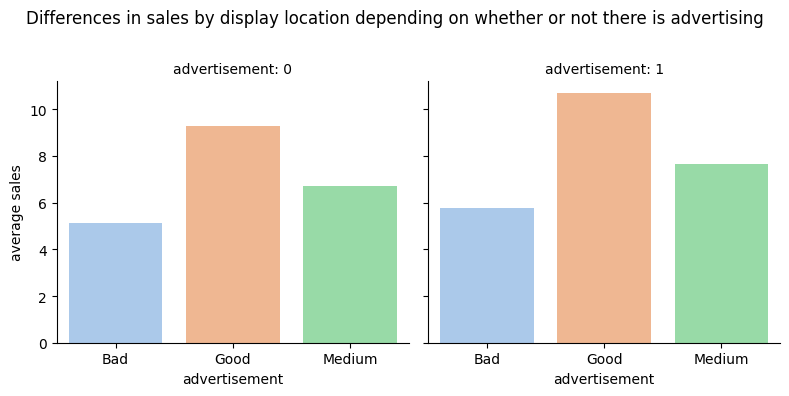

In [77]:
g = sns.catplot(data=df, x="ShelveLoc", y="Sales", col="Ad_Binary",
                kind="bar", ci=None, palette="pastel", height=4, aspect=1)

g.set_titles("advertisement: {col_name}")
g.set_axis_labels("advertisement", "average sales")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Differences in sales by display location depending on whether or not there is advertising")
plt.show()